                                                        SUPPORT VECTOR MACHINE                                                                  

Dataset Selection: 
                                                                                      
Data set Description described in another document “Drug Response Classification”              
                                             
Task 1: Exploratory Data Analysis (EDA)                                    
1.	Load the dataset and perform fundamental data exploration.
2.	Utilize histograms, box plots, or density plots to understand feature distributions.
3.	Investigate feature correlations to discern relationships within the data.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [4]:
df = pd.read_csv("Pharma_Industry.csv")
df.head()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1


In [5]:
print(" Shape of dataset:", df.shape)
print("\n Dataset Info:")
print(df.info())

 Shape of dataset: (500, 6)

 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug Dosage (mg)                500 non-null    float64
 1   Systolic Blood Pressure (mmHg)  500 non-null    float64
 2   Heart Rate (BPM)                500 non-null    float64
 3   Liver Toxicity Index (U/L)      500 non-null    float64
 4   Blood Glucose Level (mg/dL)     500 non-null    float64
 5   Drug Response                   500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB
None


In [6]:
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
       Drug Dosage (mg)  Systolic Blood Pressure (mmHg)  Heart Rate (BPM)  \
count        500.000000                      500.000000        500.000000   
mean          -0.037761                        0.214957          0.062871   
std            0.979891                        1.247567          0.971978   
min           -3.019512                       -3.773897         -2.940389   
25%           -0.642003                       -0.565168         -0.648157   
50%           -0.019340                        0.201532          0.027732   
75%            0.641151                        0.951375          0.710774   
max            2.949094                        4.111751          3.193108   

       Liver Toxicity Index (U/L)  Blood Glucose Level (mg/dL)  Drug Response  
count                  500.000000                   500.000000       500.0000  
mean                     0.054398                    -0.171863         0.5200  
std                      0.986001             

In [7]:
print("Missing Values in Each Column:")
print(df.isnull().sum())

Missing Values in Each Column:
Drug Dosage (mg)                  0
Systolic Blood Pressure (mmHg)    0
Heart Rate (BPM)                  0
Liver Toxicity Index (U/L)        0
Blood Glucose Level (mg/dL)       0
Drug Response                     0
dtype: int64


In [8]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('Drug Response')


In [9]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_cap = Q1 - 1.5 * IQR
    upper_cap = Q3 + 1.5 * IQR
    
    # Cap the values 
    df[col] = np.where(df[col] < lower_cap, lower_cap,
                       np.where(df[col] > upper_cap, upper_cap, df[col]))


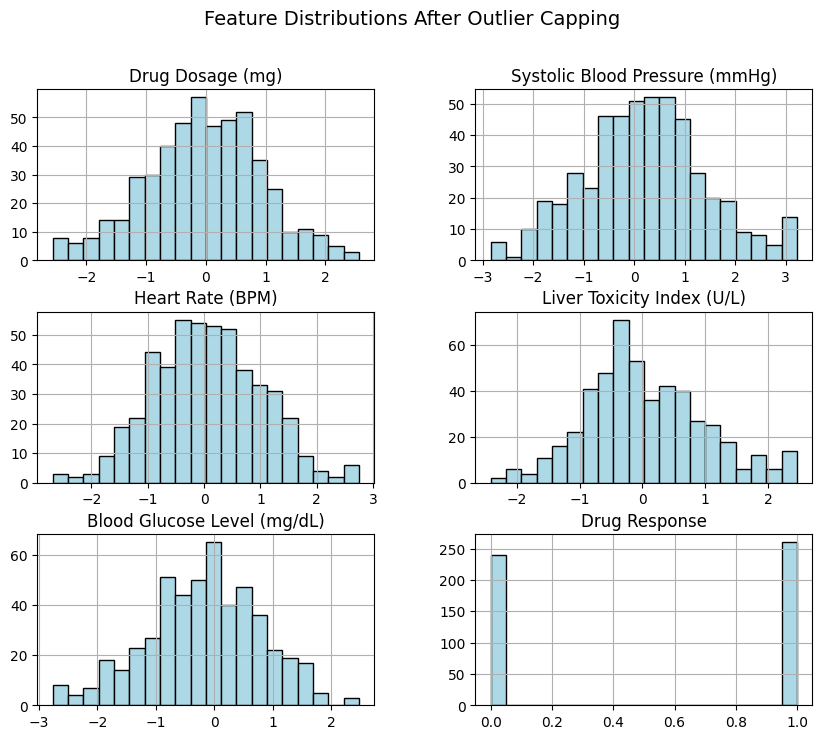

In [10]:
df.hist(figsize=(10,8), bins=20, color='lightblue', edgecolor='black')
plt.suptitle("Feature Distributions After Outlier Capping", fontsize=14)
plt.show()

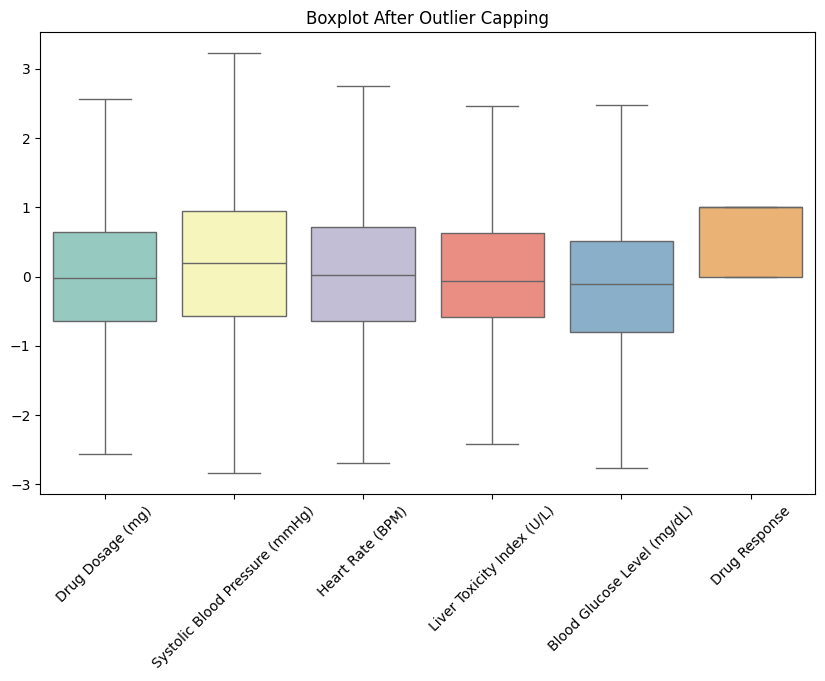

In [11]:

plt.figure(figsize=(10,6))
sns.boxplot(data=df, palette="Set3")
plt.title("Boxplot After Outlier Capping")
plt.xticks(rotation=45)
plt.show()

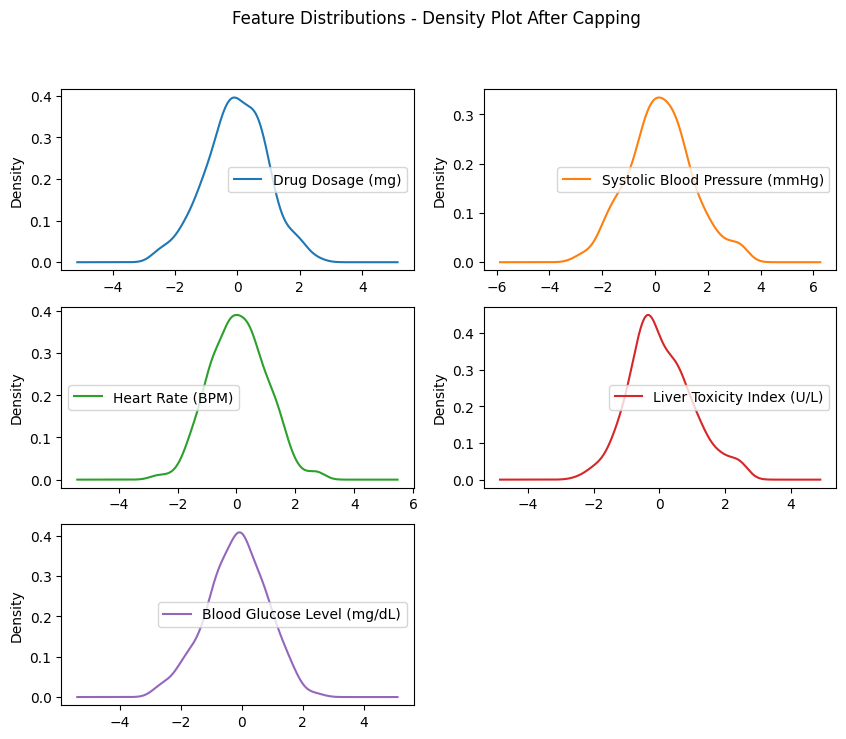

In [12]:
df.drop('Drug Response', axis=1).plot(kind='density', subplots=True, layout=(3,2), sharex=False, figsize=(10,8))
plt.suptitle("Feature Distributions - Density Plot After Capping")
plt.show()

Correlation Matrix:
                                Drug Dosage (mg)  \
Drug Dosage (mg)                        1.000000   
Systolic Blood Pressure (mmHg)          0.087760   
Heart Rate (BPM)                        0.040512   
Liver Toxicity Index (U/L)              0.128059   
Blood Glucose Level (mg/dL)             0.010070   
Drug Response                           0.043340   

                                Systolic Blood Pressure (mmHg)  \
Drug Dosage (mg)                                      0.087760   
Systolic Blood Pressure (mmHg)                        1.000000   
Heart Rate (BPM)                                     -0.041466   
Liver Toxicity Index (U/L)                            0.273864   
Blood Glucose Level (mg/dL)                           0.041263   
Drug Response                                         0.308012   

                                Heart Rate (BPM)  Liver Toxicity Index (U/L)  \
Drug Dosage (mg)                        0.040512                    0.12

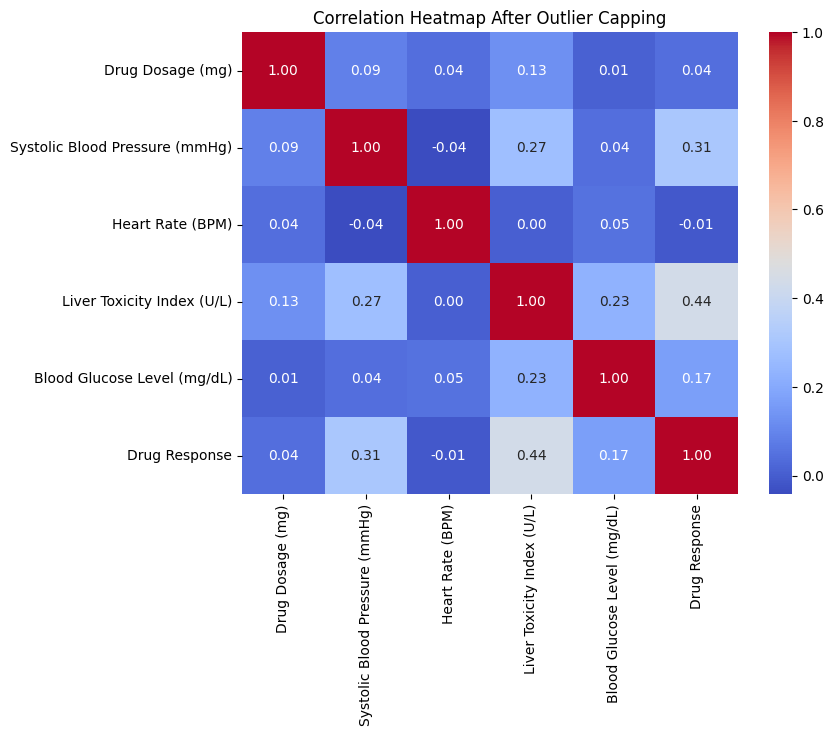

In [13]:
#Correlation Analysis
corr = df.corr()

print("Correlation Matrix:")
print(corr)

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap After Outlier Capping")
plt.show()

Task 2: Data Preprocessing
1.	Encode categorical variables if necessary.
2.	Split the dataset into training and testing sets.


In [14]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

if len(categorical_cols) > 0:
    print(f"Encoding categorical columns: {list(categorical_cols)}")
    encoder = LabelEncoder()
    for col in categorical_cols:
        df[col] = encoder.fit_transform(df[col])
else:
    print("No categorical columns found. Let's Skipping encoding step.")

No categorical columns found. Let's Skipping encoding step.


In [15]:
X = df.drop('Drug Response', axis=1)   # Features
y = df['Drug Response']                # Target variable

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (400, 5)
Testing set shape: (100, 5)


Task 3: Data Visualization
1.	Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.
2.	Visualize class distributions to gauge dataset balance or imbalance.


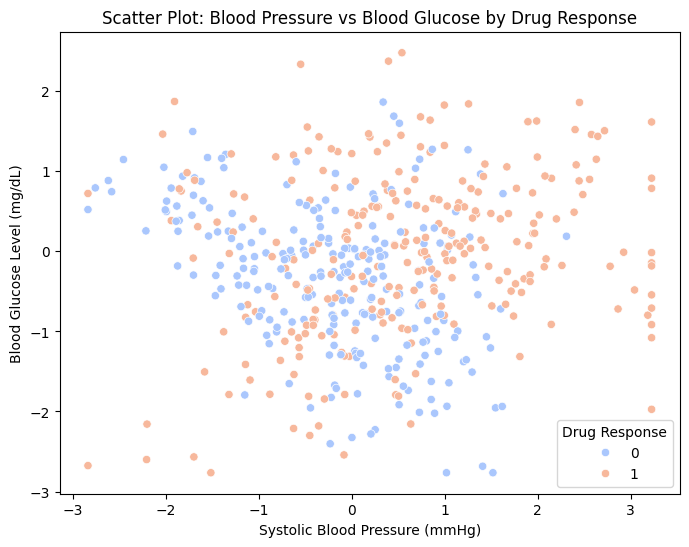

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Systolic Blood Pressure (mmHg)',
    y='Blood Glucose Level (mg/dL)',
    hue='Drug Response',
    data=df,
    palette='coolwarm'
)
plt.title('Scatter Plot: Blood Pressure vs Blood Glucose by Drug Response')
plt.show()

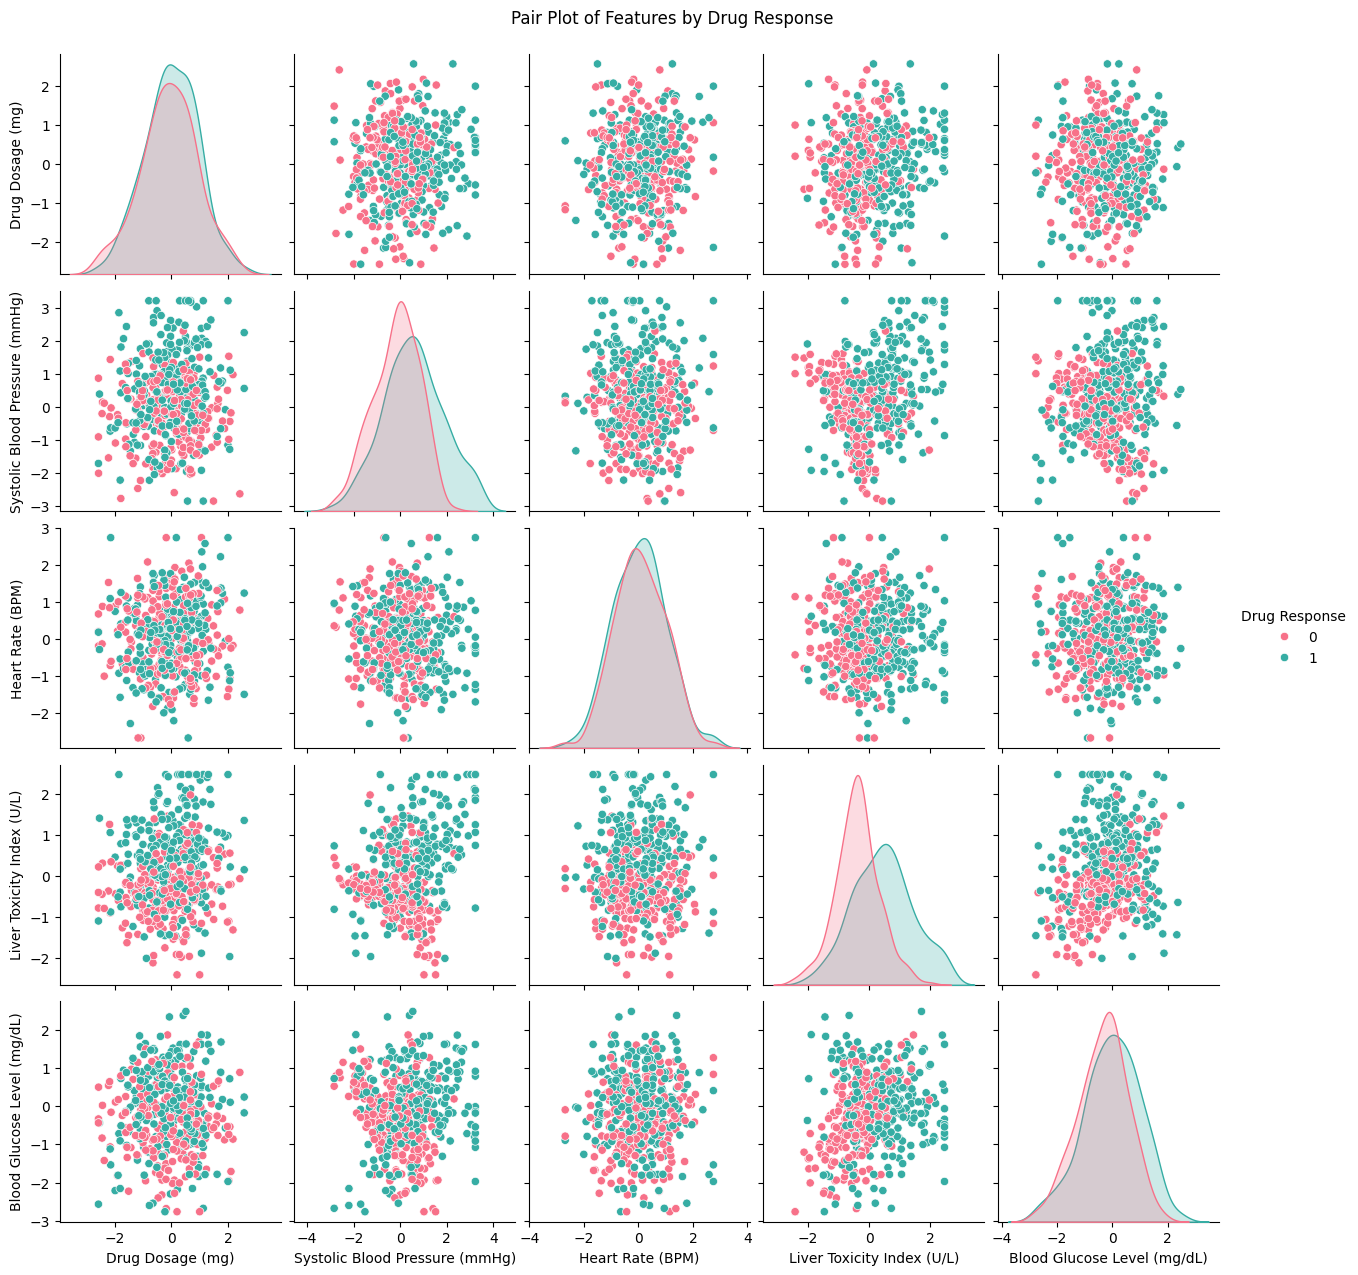

In [17]:
sns.pairplot(df, hue='Drug Response', palette='husl', diag_kind='kde')
plt.suptitle("Pair Plot of Features by Drug Response", y=1.02)
plt.show()

C:\Users\kanch\AppData\Local\Temp\ipykernel_16056\1570947592.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Drug Response', data=df, palette='Set2')


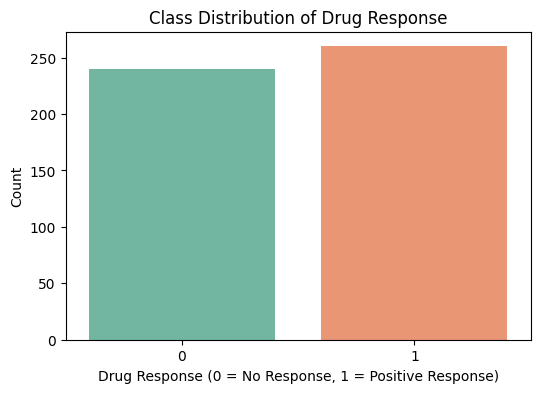

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x='Drug Response', data=df, palette='Set2')
plt.title("Class Distribution of Drug Response")
plt.xlabel("Drug Response (0 = No Response, 1 = Positive Response)")
plt.ylabel("Count")
plt.show()


In [19]:
class_counts = df['Drug Response'].value_counts()
print("Class Distribution (Count):")
print(class_counts)

Class Distribution (Count):
Drug Response
1    260
0    240
Name: count, dtype: int64


In [20]:
print(" Class Distribution (Percentage):")
print((class_counts / len(df) * 100).round(2))

 Class Distribution (Percentage):
Drug Response
1    52.0
0    48.0
Name: count, dtype: float64


Task 4: SVM Implementation
1.	Implement a basic SVM classifier using Python libraries like scikit-learn.
2.	Train the SVM model on the training data.
3.	Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).


In [21]:
#Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# Initialize and train the SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [23]:
y_pred = svm_model.predict(X_test_scaled)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")

Model Evaluation Metrics:
Accuracy  : 0.7700
Precision : 0.7544
Recall    : 0.8269
F1 Score  : 0.7890


In [24]:
print(classification_report(y_test, y_pred, target_names=['No Response (0)', 'Positive Response (1)']))

                       precision    recall  f1-score   support

      No Response (0)       0.79      0.71      0.75        48
Positive Response (1)       0.75      0.83      0.79        52

             accuracy                           0.77       100
            macro avg       0.77      0.77      0.77       100
         weighted avg       0.77      0.77      0.77       100



Task 5: Visualization of SVM Results
1.	Visualize classification results on the testing data.


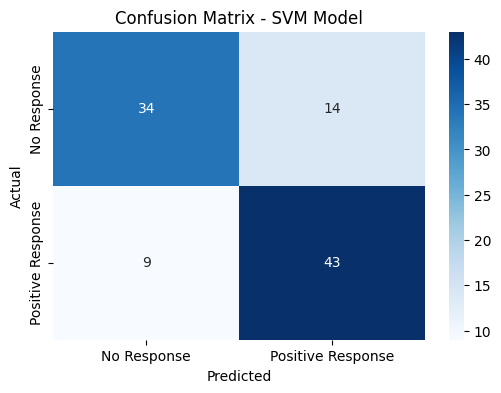

In [25]:
# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Response', 'Positive Response'], yticklabels=['No Response', 'Positive Response'])
plt.title("Confusion Matrix - SVM Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

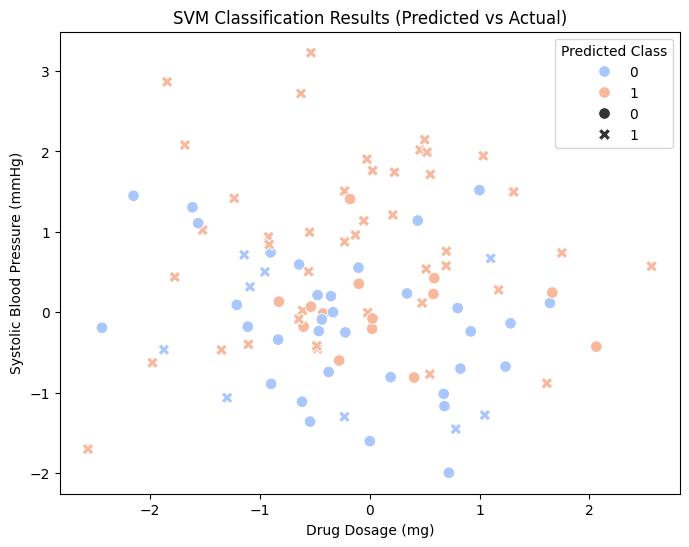

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_test.iloc[:, 0],
    y=X_test.iloc[:, 1],
    hue=y_pred,
    style=y_test,
    palette='coolwarm',
    s=70
)
plt.title("SVM Classification Results (Predicted vs Actual)")
plt.xlabel(X_test.columns[0])
plt.ylabel(X_test.columns[1])
plt.legend(title="Predicted Class")
plt.show()

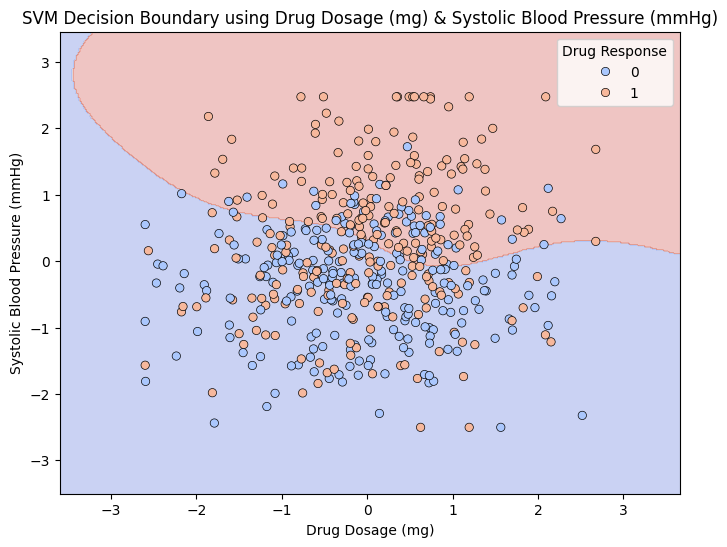

In [27]:
# ---------------------------------------------
# 2️⃣ Decision Boundary Visualization (2 Features)
# ---------------------------------------------
# Select two features for visualization
feature1 = X.columns[0]
feature2 = X.columns[1]

# Prepare data for 2D plot
X_vis = df[[feature1, feature2]]
y_vis = df['Drug Response']

# Scale features
scaler_vis = StandardScaler()
X_vis_scaled = scaler_vis.fit_transform(X_vis)

# Train model again on 2D data
svm_vis = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_vis.fit(X_vis_scaled, y_vis)

# Train model again on 2D data
svm_vis = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_vis.fit(X_vis_scaled, y_vis)

# Create meshgrid
x_min, x_max = X_vis_scaled[:, 0].min() - 1, X_vis_scaled[:, 0].max() + 1
y_min, y_max = X_vis_scaled[:, 1].min() - 1, X_vis_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict over grid
Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
sns.scatterplot(
    x=X_vis_scaled[:, 0],
    y=X_vis_scaled[:, 1],
    hue=y_vis,
    palette='coolwarm',
    edgecolor='k'
)
plt.title(f"SVM Decision Boundary using {feature1} & {feature2}")
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.show()

Task 6: Parameter Tuning and Optimization
1.	Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.


In [28]:
param_grid = {
    'C': [0.1, 1, 10, 50],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]  
}

svm = SVC(random_state=42)

# Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


,estimator,SVC(random_state=42)
,param_grid,"{'C': [0.1, 1, ...], 'degree': [2, 3, ...], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'poly', ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,10


In [29]:
print("Best Parameters Found:")
print(grid_search.best_params_)

print("\nBest Cross-Validation Accuracy: {:.4f}".format(grid_search.best_score_))


Best Parameters Found:
{'C': 10, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}

Best Cross-Validation Accuracy: 0.7600


In [30]:
best_svm = grid_search.best_estimator_

y_pred = best_svm.predict(X_test_scaled)

In [31]:
print("\n🧾 Classification Report:")
print(classification_report(y_test, y_pred))


🧾 Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.71      0.73        48
           1       0.75      0.79      0.77        52

    accuracy                           0.75       100
   macro avg       0.75      0.75      0.75       100
weighted avg       0.75      0.75      0.75       100



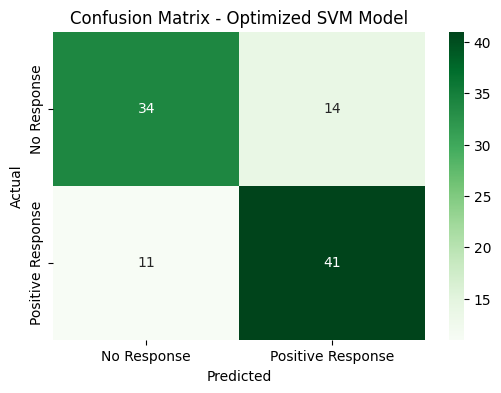

In [32]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['No Response', 'Positive Response'], yticklabels=['No Response', 'Positive Response'])
plt.title("Confusion Matrix - Optimized SVM Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Task 7: Comparison and Analysis
1.	Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).
2.	Analyze SVM strengths and weaknesses for the dataset based on EDA and visualization results.
3.	Discuss practical implications of SVM in real-world classification tasks.


In [33]:
# Kernels to compare
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

results = []

for kernel in kernels:
    model = SVC(kernel=kernel, C=1.0, gamma='scale', random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        'Kernel': kernel,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    })


In [34]:
# Comparison table
comparison_df = pd.DataFrame(results)
print("SVM Kernel Performance Comparison:\n")
print(comparison_df)

SVM Kernel Performance Comparison:

    Kernel  Accuracy  Precision    Recall  F1-Score
0   linear      0.72   0.760870  0.673077  0.714286
1     poly      0.66   0.673077  0.673077  0.673077
2      rbf      0.77   0.754386  0.826923  0.788991
3  sigmoid      0.68   0.692308  0.692308  0.692308


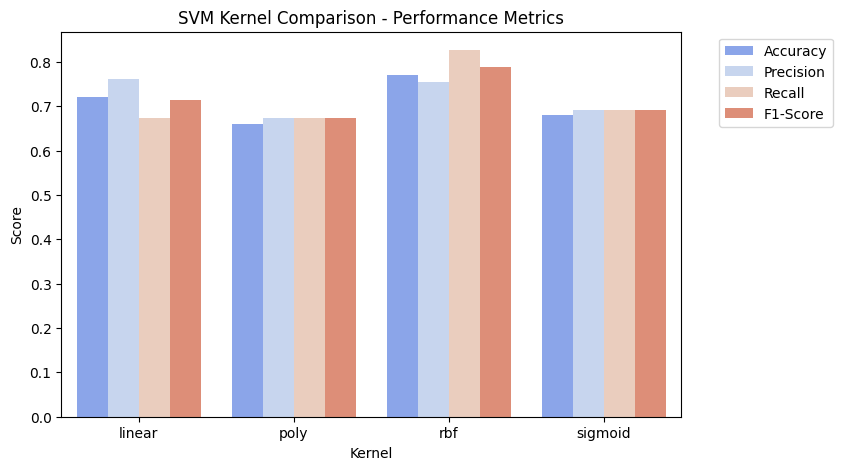

In [35]:
plt.figure(figsize=(8,5))
sns.barplot(data=comparison_df.melt(id_vars='Kernel', var_name='Metric', value_name='Score'),
            x='Kernel', y='Score', hue='Metric', palette='coolwarm')
plt.title("SVM Kernel Comparison - Performance Metrics")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Analysis of SVM Strengths & Weaknesses 
    
1. Strengths:       
           
* Works very well on smaller to medium-sized datasets with clear class boundaries.
              
* RBF kernel can model non-linear relationships effectively, which is useful when biological features interact in complex ways.         
                 
* SVMs are robust to overfitting when properly regularized (tuned C and gamma).
              
* Performs well even with high-dimensional data (many features).

2. Weaknesses:
         
* Training time increases with large datasets — not ideal for massive pharma data.
           
* Parameter tuning (choosing kernel, C, gamma) can be computationally expensive.
            
* SVMs don’t directly provide probability outputs, which can limit interpretability in clinical decision-making.
        
* May struggle with noisy or overlapping classes, especially when biological variation is high.

## Practical Implications of SVM in Real-World Healthcare         
          
1. Personalized Medicine: 
 
* SVM models can help identify which patients will likely respond positively to a specific drug.

* Enables tailored treatments and reduces side effects.

2. Clinical Trial Optimization:
           
* Predicts early whether a drug is effective for a subset of patients → saves time and cost in trials.
       
3. Healthcare Predictive Analytics:
     
* Can classify patients based on biomarkers, genetic data, or lab results to predict disease progression or treatment response.
             
4. Data-Driven Decisions:
 
* SVMs can assist researchers and doctors with data-backed predictions, improving accuracy in medical recommendations.